Task 1: Outlier Identification and Handling
    Two Methods are used to identify and handle outliers
    - Z-score
    - Interquartile Range 

Reference: 
Fatakdawala, M. (2019, April 18). Income dataset. Kaggle. https://www.kaggle.com/datasets/mastmustu/income 
Rogel-Salazar, J. (2023). Statistics and data visualisation with python. CRC Press. 

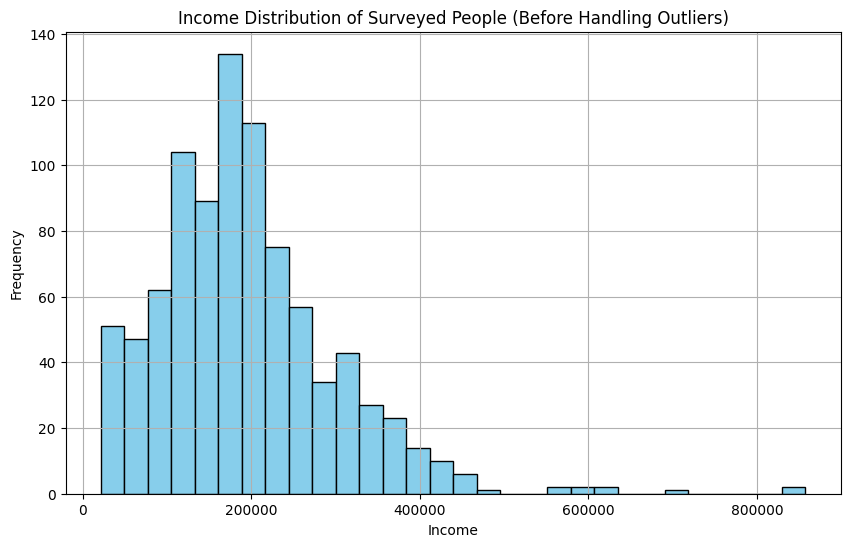

Outliers: 
      Age  Income     Education      Marital Status  Gender   Race  \
13    58  605504       HS-grad  Married-civ-spouse    Male  White   
24    33  857532          12th       Never-married    Male  Black   
35    25  441210       HS-grad       Never-married    Male  White   
68    39  597843       Masters       Never-married  Female  White   
106   22  429346       HS-grad       Never-married    Male  Black   
141   31  574005     Bachelors  Married-civ-spouse    Male  White   
210   22  442478  Some-college       Never-married    Male  White   
216   44  462838       HS-grad            Divorced  Female  White   
243   25  629900     Bachelors  Married-civ-spouse  Female  Black   
244   27  706026          11th  Married-civ-spouse    Male  White   
255   40  436493       HS-grad       Never-married    Male  White   
277   18  436163          11th       Never-married    Male  White   
391   21  438139       HS-grad       Never-married    Male  White   
490   30  433325      

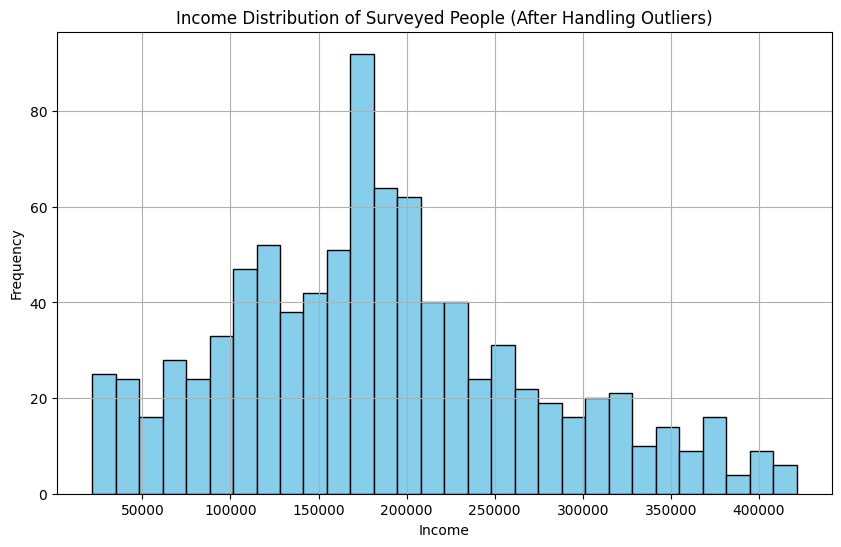

In [4]:
# Interquartile Range
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the income dataset from a CSV file
income_data = pd.read_csv('incomedata.csv')

income_df = pd.DataFrame({
    'Age': income_data['age'],
    'Income': income_data['fnlwgt'],
    'Education': income_data['education'],
    'Marital Status': income_data['marital-status'],
    'Gender': income_data['gender'],
    'Race': income_data['race'],
    'Hours Worked/Week': income_data['hours-per-week']
})

# Generate a histogram to visualize the income distribution before handling outliers
plt.figure(figsize=(10, 6))
plt.hist(income_df['Income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution of Surveyed People (Before Handling Outliers)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

def handle_outliers(df, income_column):
    Q1 = df[income_column].quantile(0.25)
    Q3 = df[income_column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[income_column] < lower_bound) | (df[income_column] > upper_bound)]

    print(f'Outliers: \n {outliers}')

    df[income_column] = np.where((df[income_column] < lower_bound) | (df[income_column] > upper_bound), df[income_column].median(), df[income_column])
    df.to_csv(output_file_path, index=False)

    return outliers

income_column = 'Income'
output_file_path = 'result.csv'
outliers = handle_outliers(income_df, income_column)

# Generate a histogram to visualize the income distribution after handling outliers
plt.figure(figsize=(10, 6))
plt.hist(income_df[income_column], bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution of Surveyed People (After Handling Outliers)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

Z-score :0      1.267039
1     -0.675560
2      0.366647
3      1.716243
4      1.115636
         ...   
894    1.031545
895    0.228442
896   -0.638532
897   -0.583837
898   -1.424130
Name: Income, Length: 899, dtype: float64
Outliers:
     Age  Income  Education      Marital Status  Gender   Race  \
13    58  605504    HS-grad  Married-civ-spouse    Male  White   
24    33  857532       12th       Never-married    Male  Black   
68    39  597843    Masters       Never-married  Female  White   
141   31  574005  Bachelors  Married-civ-spouse    Male  White   
243   25  629900  Bachelors  Married-civ-spouse  Female  Black   
244   27  706026       11th  Married-civ-spouse    Male  White   
499   41  557349    HS-grad  Married-civ-spouse    Male  White   
807   25  632834    HS-grad       Never-married    Male  Black   
820   47  849067       12th            Divorced    Male  Black   

     Hours Worked/Week  
13                  40  
24                  40  
68                  50  
14

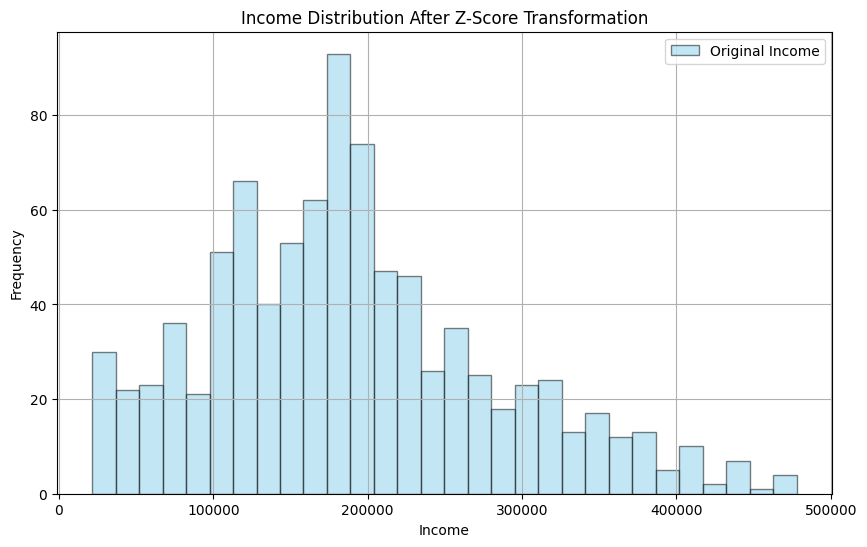

In [3]:
# Z-Score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the income dataset from CSV file
income_data = pd.read_csv('incomedata.csv')
income_df = pd.DataFrame({
    'Age': income_data['age'],
    'Income': income_data['fnlwgt'],
    'Education': income_data['education'],
    'Marital Status': income_data['marital-status'],
    'Gender': income_data['gender'],
    'Race': income_data['race'],
    'Hours Worked/Week': income_data['hours-per-week']
})

# Extract the 'Income' column
income_column = income_df['Income']
                      

# Calculate the z-scores for the 'Income' column
z_scores = (income_column - income_column.mean()) / income_column.std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
z_threshold = 3

print(f'Z-score :{z_scores}')
# Identify outliers based on the z-scores
outliers = income_df[abs(z_scores) > z_threshold]

# Print the outliers
print("Outliers:")
print(outliers)


# Handle outliers 
median_income = income_column.median()
income_df.loc[abs(z_scores) > z_threshold, 'Income'] = median_income
z_scores = (income_column - income_column.mean()) / income_column.std()

#Set up a histogram
plt.figure(figsize=(10, 6))
plt.hist(income_column, bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Original Income')
plt.title('Income Distribution After Z-Score Transformation')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the histogram
plt.show()

Task 2: Bias and Confounding Variables Identification
    There are numerous bias that could have occurred in the data selected above. Some of these are:

There might have been convenience sampling or voluntary response sampling. This could mean that if the survey was taken online, there might be biased towards respondent who are tech savvy or have internet access

Errors or inconsistencies could have occurred when the data is collected or measured. If the data was self-reported then income could have been underreported or overreported

Differences in income, lifestyle or other factors can vary significantly for different culture and geographic regions. Ensuring that the dataset represent diverse range of population to capture different income

There could have been a response bias in the sense that respondents provide answers that they believe are socially desirable rather than accurate.

These biases could skew the data which could impact the validity of the analysis. It is important to minimizing these biases through transparency, statistical techniques, and documentation how the data collection is conducted.

Task 3: Handling Missing Data
There are multiple way to handle missing data. It could be
- Replacing the missing values with estimated values. These values could be the median or mode
- Deleting the the missing data. However this could cause loss of information and potential bias
- Creating a separate category to represent missing data

In Task 1, to handle the outliers change them into the median to fit the dataset without having to loss information


Task 4: Analysis of Mean and Median
Using Dataset from Task 1 
The mean and median has a difference of about 12716. Due to the outlier, the mean was skewed more towards the higher end of the income bracket. This are due to the outliers in that were more than 400,000. After handling the outliers the mean and median were closet to each other.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the income dataset from a CSV file (replace 'incomedata.csv' with your file path)
income_data = pd.read_csv('test.csv')
income_df = pd.DataFrame({
    'Age': income_data['age'],
    'Income': income_data['fnlwgt'],
    'Education': income_data['education'],
    'Marital Status': income_data['marital-status'],
    'Gender': income_data['gender'],
    'Race': income_data['race'],
    'Hours Worked/Week': income_data['hours-per-week']
})

# Extract the 'Income' column
income_column = income_df['Income']
                            
# create an array of the income
income = np.array(income_column)

# Calculate the mean and median
mean = np.mean(income)
median = np.median(income)

# Print out the mean and median
print(f'Mean: {mean}')
print(f'Median: {median}')


# Calculate the z-scores for the 'Income' column
z_scores = (income_column - income_column.mean()) / income_column.std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
z_threshold = 3

# Identify outliers based on the z-scores
outliers = income_df[abs(z_scores) > z_threshold]


# Handle outliers 
median_income = income_column.median()
income_df.loc[abs(z_scores) > z_threshold, 'Income'] = median_income
z_scores = (income_column - income_column.mean()) / income_column.std()

# Create the array after the outliers are handled
income_afterz =  np.array(income_df['Income'])

# Calculate the mean an median after
mean2 = np.mean(income_afterz)
median2 = np.median(income_afterz)

# Print out new mean and median
print(f'Mean after handling outliers : {mean2}')
print(f'Median after handling outliers : {median2}')

Mean: 194150.01779755283
Median: 181434.0
Mean after handling outliers : 189281.10344827586
Median after handling outliers : 181434.0


Task 5: Data Visualization
Using the dataset from Task 1

Task 6: Measures of Central Tendency and Variability

Reference:
Bharaskar, A. (2023, September 12). Students test data. Kaggle. https://www.kaggle.com/datasets/atharvbharaskar/students-test-data 

In [10]:
import pandas as pd
import numpy as np 
from scipy import stats

# Read the CSV file
data_score = pd.read_csv('Private_data.csv')
# Create an array for the Total Score of the students
total_score = np.array(data_score['TOTAL SCORE (OUT of 100)'])
# Calculate the mean
mean = np.mean(total_score)
# Calculate the median
median = np.median(total_score)
# Calculate the mode
mode = stats.mode(total_score) 
# Calculate min and max of the data set
maxVal = max(total_score)
minVal = min(total_score)
# Calculate the range using min and max
data_range = maxVal - minVal
# Calculate th Variance
variance = np.var(total_score)
# Calculate the standard deviation
std_dev = np.std(total_score)


# Print out all of the calculations
# Average of the total score
print(f'Mean: {mean}') 
# Middle value of the data set
print(f'Median: {median}')
# Frequent value that occur
print(f'Mode: {mode}')
# The min and max value of the data set
print(f'Minimun Value: {minVal}')
print(f'Maximum Value: {maxVal}')
# range of the data set provides the spread of the data set
print(f'Data Range: {data_range}')
# Indicate how much each data points deviate from the average
# How data points dispered from the mean
# Measurs variability
print(f'Variance: {variance}')
# Indicates deviation from the average
# Calculates the typical distance from data point to the mean
print(f'Standard Deviation: {std_dev}')




Mean: 71.62913907284768
Median: 74.0
Mode: ModeResult(mode=89, count=8)
Minimun Value: 5
Maximum Value: 100
Data Range: 95
Variance: 446.49822376211563
Standard Deviation: 21.13050457897576


Task 6: Data Cleaning 
Use data from Task 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the income dataset from a CSV file
income_data = pd.read_csv('incomedata.csv')

# Simplified the columns for the data 
# Removed Capital Gain and Capital Loss cause all of the data were 0
income_df = pd.DataFrame({
    'Age': income_data['age'],
    'Income': income_data['fnlwgt'],
    'Education': income_data['education'],
    'Marital Status': income_data['marital-status'],
    'Gender': income_data['gender'],
    'Race': income_data['race'],
    'Hours Worked/Week': income_data['hours-per-week']
})

# Dropped any duplicates
income_df.drop_duplicates(inplace=True)

# Exported data to a new csv file
income_df.to_csv('cleaned_data.csv')

print(income_data)
print(income_df)

     age         workclass  fnlwgt     education  educational-num  \
0     39  Self-emp-not-inc  327120       HS-grad                9   
1     32           Private  123253    Assoc-acdm               12   
2     47           Private  232628       HS-grad                9   
3     19           Private  374262          12th                8   
4     46  Self-emp-not-inc  311231       HS-grad                9   
..   ...               ...     ...           ...              ...   
894   27           Private  302406       Masters               14   
895   17           Private  218124          11th                7   
896   24           Private  127139  Some-college               10   
897   35           Private  132879  Some-college               10   
898   37         Local-gov   44694       Masters               14   

         marital-status         occupation relationship   race  gender  \
0    Married-civ-spouse       Craft-repair      Husband  White    Male   
1    Married-civ-spouse

Task 7: Group Analysis
Use data from Task 1

                 mean    median           var            std
Gender                                                      
Female  185948.484642  180551.0  8.673470e+09   93131.464337
Male    198115.445545  181968.5  1.211286e+10  110058.459662


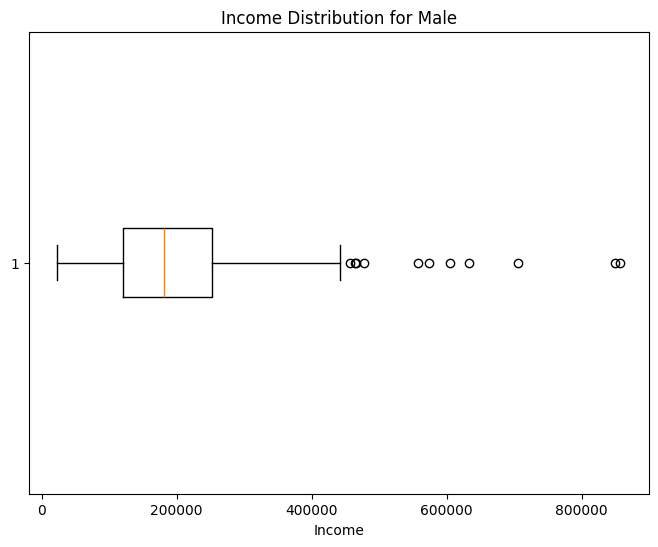

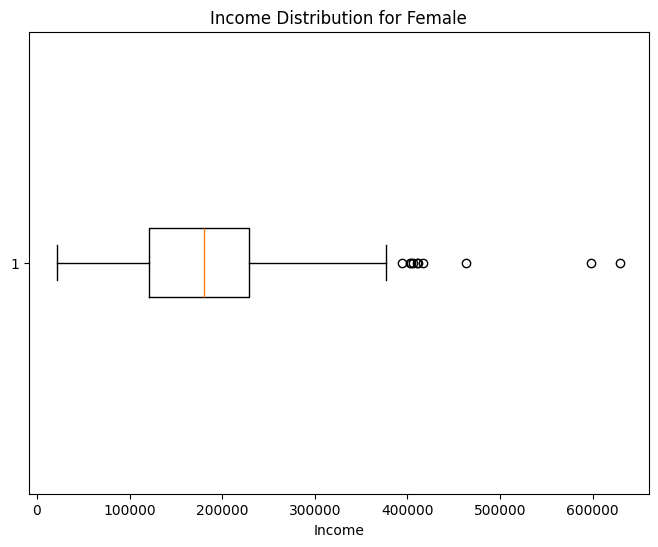

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the income dataset from a CSV file
income_data = pd.read_csv('incomedata.csv')

# Create a DataFrame
income_df = pd.DataFrame({
    'Age': income_data['age'],
    'Income': income_data['fnlwgt'],  
    'Education': income_data['education'],
    'Marital Status': income_data['marital-status'],
    'Gender': income_data['gender'],
    'Race': income_data['race'],
    'Hours Worked/Week': income_data['hours-per-week']
})

# Define the categorical variable
categorical_variable = 'Gender'

# Group the data by the categorical variable
grouped_data = income_df.groupby(categorical_variable)

# Calculate measures of central tendency and variability for 'Income' in each group
summary_stats = grouped_data['Income'].agg(['mean', 'median', 'var', 'std'])

# Print the summary statistics
print(summary_stats)

# Show box plot for male
male_data = income_df[income_df['Gender'] == 'Male']
plt.figure(figsize=(8, 6))
plt.boxplot(male_data['Income'], vert=False)
plt.title('Income Distribution for Male')
plt.xlabel('Income')

# Show box plot for Female
female_data = income_df[income_df['Gender'] == 'Female']
plt.figure(figsize=(8, 6))
plt.boxplot(female_data['Income'], vert=False)
plt.title('Income Distribution for Female')
plt.xlabel('Income')
plt.show()
